# **Modelo Predictivo de Bitcoin**

## Importando Librerias





In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#Librería para gráficos de vela
import plotly.graph_objects as go

## Lectura del DataFrame

In [49]:
df_original = pd.read_csv(r"C:\PythonProjects\IA-TalentoTech\Proyecto\BTCUSD_1m_Binance.csv")
df = df_original.copy()
df

Open time       Open       High        Low      Close  \
0        2017-08-17 04:00:00    4261.48    4261.48    4261.48    4261.48   
1        2017-08-17 04:01:00    4261.48    4261.48    4261.48    4261.48   
2        2017-08-17 04:02:00    4280.56    4280.56    4280.56    4280.56   
3        2017-08-17 04:03:00    4261.48    4261.48    4261.48    4261.48   
4        2017-08-17 04:04:00    4261.48    4261.48    4261.48    4261.48   
...                      ...        ...        ...        ...        ...   
4140864  2025-07-07 18:16:00  108050.72  108050.73  107909.00  107909.00   
4140865  2025-07-07 18:17:00  107908.00  107908.01  107850.00  107850.01   
4140866  2025-07-07 18:18:00  107850.00  107883.00  107850.00  107882.99   
4140867  2025-07-07 18:19:00  107882.99  107888.42  107846.15  107865.57   
4140868  2025-07-07 18:20:00  107865.57  107865.58  107865.57  107865.58   

            Volume               Close time  Quote asset volume  \
0         1.775183  2017-08-17 04:00:59.999        7.564907e+03   
1         0.000000  2017-08-17 04:01:59.999        0.000000e+00   
2         0.261074  2017-08-17 04:02:59.999        1.117543e+03   
3         0.012008  2017-08-17 04:03:59.999        5.117185e+01   
4         0.140796  2017-08-17 04:04:59.999        5.999993e+02   
...            ...                      ...                 ...   
4140864  14.476280  2025-07-07 18:16:59.999        1.562923e+06   
4140865   4.298960  2025-07-07 18:17:59.999        4.638043e+05   
4140866   7.112420  2025-07-07 18:18:59.999        7.671104e+05   
4140867   3.555990  2025-07-07 18:19:59.999        3.835744e+05   
4140868   0.941710  2025-07-07 18:20:59.999        1.015781e+05   

         Number of trades  Taker buy base asset volume  \
0                     3.0                     0.075183   
1                     0.0                     0.000000   
2                     2.0                     0.261074   
3                     3.0                     0.012008   
4                     1.0                     0.140796   
...                   ...                          ...   
4140864            3210.0                     0.519780   
4140865            2250.0                     0.561570   
4140866            1836.0                     6.948480   
4140867            2062.0                     1.389830   
4140868             140.0                     0.802400   

         Taker buy quote asset volume  Ignore  
0                          320.390851     0.0  
1                            0.000000     0.0  
2                         1117.542921     0.0  
3                           51.171852     0.0  
4                          599.999338     0.0  
...                               ...     ...  
4140864                  56105.782928     0.0  
4140865                  60576.873791     0.0  
4140866                 749429.119715     0.0  
4140867                 149931.834597     0.0  
4140868                  86551.341392     0.0  

[4140869 rows x 12 columns]

## Análisis exploratorio de los datos

In [50]:
#Verificando cantidad de datos nulos
df.isnull().sum()

Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
dtype: int64

In [51]:
#Verificando cantidad de datos duplicados
df.duplicated().sum()

np.int64(0)

In [52]:
# Descripcion Estadistica
df.describe().T

count          mean           std     min  \
Open                          4140869.0  3.156647e+04  2.745381e+04  2830.0   
High                          4140869.0  3.158162e+04  2.746345e+04  2830.0   
Low                           4140869.0  3.155117e+04  2.744414e+04  2817.0   
Close                         4140869.0  3.156648e+04  2.745384e+04  2817.0   
Volume                        4140869.0  4.538443e+01  8.800813e+01     0.0   
Quote asset volume            4140869.0  1.221076e+06  2.378068e+06     0.0   
Number of trades              4140869.0  1.223892e+03  2.037618e+03     0.0   
Taker buy base asset volume   4140869.0  2.255153e+01  4.488652e+01     0.0   
Taker buy quote asset volume  4140869.0  6.038524e+05  1.238136e+06     0.0   
Ignore                        4140869.0  0.000000e+00  0.000000e+00     0.0   

                                        25%            50%           75%  \
Open                            8832.330000   22946.990000  4.709212e+04   
High                            8838.610000   22958.100000  4.712001e+04   
Low                             8826.290000   22935.180000  4.706414e+04   
Close                           8832.330000   22947.170000  4.709199e+04   
Volume                             9.200090      20.114600  4.515194e+01   
Quote asset volume            148181.576172  473595.169390  1.357227e+06   
Number of trades                 203.000000     538.000000  1.319000e+03   
Taker buy base asset volume        4.043140       9.609735  2.253736e+01   
Taker buy quote asset volume   62736.832095  215080.481732  6.597183e+05   
Ignore                             0.000000       0.000000  0.000000e+00   

                                       max  
Open                          1.119241e+05  
High                          1.119800e+05  
Low                           1.119153e+05  
Close                         1.119241e+05  
Volume                        5.877775e+03  
Quote asset volume            2.598501e+08  
Number of trades              1.497130e+05  
Taker buy base asset volume   3.537453e+03  
Taker buy quote asset volume  1.482314e+08  
Ignore                        0.000000e+00

In [53]:
# Columnas del dataset
df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Ignore'],
      dtype='object')

In [54]:
# Tamaño del dataset
df.shape

(4140869, 12)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140869 entries, 0 to 4140868
Data columns (total 12 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Open time                     object 
 1   Open                          float64
 2   High                          float64
 3   Low                           float64
 4   Close                         float64
 5   Volume                        float64
 6   Close time                    object 
 7   Quote asset volume            float64
 8   Number of trades              float64
 9   Taker buy base asset volume   float64
 10  Taker buy quote asset volume  float64
 11  Ignore                        float64
dtypes: float64(10), object(2)
memory usage: 379.1+ MB


## Limpieza de datos

Eliminación de columnas innecesarias

In [56]:
df.drop(columns=["Ignore", "Close time"], inplace=True)
df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume'],
      dtype='object')

### Creación y conversión de datos en nuevas columnas (date y hour)

In [57]:
# Convertir a datetime
df["Datetime"] = pd.to_datetime(df["Open time"])

# Extraer fecha y hora
df["Date"] = df["Datetime"].dt.date
df["Hour"] = df["Datetime"].dt.hour

# Convertir Date a datetime64
df["Date"] = pd.to_datetime(df["Date"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140869 entries, 0 to 4140868
Data columns (total 13 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Open time                     object        
 1   Open                          float64       
 2   High                          float64       
 3   Low                           float64       
 4   Close                         float64       
 5   Volume                        float64       
 6   Quote asset volume            float64       
 7   Number of trades              float64       
 8   Taker buy base asset volume   float64       
 9   Taker buy quote asset volume  float64       
 10  Datetime                      datetime64[ns]
 11  Date                          datetime64[ns]
 12  Hour                          int32         
dtypes: datetime64[ns](2), float64(9), int32(1), object(1)
memory usage: 394.9+ MB


### Límite de registros

El dataset se está actualizando constantemente, por lo que esto es una medida de estandarización para evaluar los resultados

In [58]:
df = df[df['Date'] <= pd.Timestamp(dt.date(year=2025, month=6, day=30))]

In [59]:
df

Open time       Open       High        Low      Close  \
0        2017-08-17 04:00:00    4261.48    4261.48    4261.48    4261.48   
1        2017-08-17 04:01:00    4261.48    4261.48    4261.48    4261.48   
2        2017-08-17 04:02:00    4280.56    4280.56    4280.56    4280.56   
3        2017-08-17 04:03:00    4261.48    4261.48    4261.48    4261.48   
4        2017-08-17 04:04:00    4261.48    4261.48    4261.48    4261.48   
...                      ...        ...        ...        ...        ...   
4131123  2025-06-30 23:55:00  107104.12  107104.12  107093.34  107093.34   
4131124  2025-06-30 23:56:00  107093.35  107093.35  107071.64  107071.65   
4131125  2025-06-30 23:57:00  107071.64  107086.00  107071.64  107085.99   
4131126  2025-06-30 23:58:00  107085.99  107140.00  107085.99  107139.99   
4131127  2025-06-30 23:59:00  107140.00  107176.24  107139.99  107146.50   

            Volume  Quote asset volume  Number of trades  \
0         1.775183        7.564907e+03               3.0   
1         0.000000        0.000000e+00               0.0   
2         0.261074        1.117543e+03               2.0   
3         0.012008        5.117185e+01               3.0   
4         0.140796        5.999993e+02               1.0   
...            ...                 ...               ...   
4131123   1.489080        1.594723e+05             370.0   
4131124   1.729470        1.852058e+05             591.0   
4131125   5.136420        5.500011e+05             516.0   
4131126  14.187840        1.519565e+06            2001.0   
4131127  18.781830        2.012882e+06            2024.0   

         Taker buy base asset volume  Taker buy quote asset volume  \
0                           0.075183                  3.203909e+02   
1                           0.000000                  0.000000e+00   
2                           0.261074                  1.117543e+03   
3                           0.012008                  5.117185e+01   
4                           0.140796                  5.999993e+02   
...                              ...                           ...   
4131123                     1.046640                  1.120883e+05   
4131124                     0.200040                  2.142194e+04   
4131125                     2.935670                  3.143323e+05   
4131126                    13.914420                  1.490284e+06   
4131127                    14.641330                  1.569168e+06   

                   Datetime       Date  Hour  
0       2017-08-17 04:00:00 2017-08-17     4  
1       2017-08-17 04:01:00 2017-08-17     4  
2       2017-08-17 04:02:00 2017-08-17     4  
3       2017-08-17 04:03:00 2017-08-17     4  
4       2017-08-17 04:04:00 2017-08-17     4  
...                     ...        ...   ...  
4131123 2025-06-30 23:55:00 2025-06-30    23  
4131124 2025-06-30 23:56:00 2025-06-30    23  
4131125 2025-06-30 23:57:00 2025-06-30    23  
4131126 2025-06-30 23:58:00 2025-06-30    23  
4131127 2025-06-30 23:59:00 2025-06-30    23  

[4131128 rows x 13 columns]

### Reducciendo columnas y agrupando por día y hora

In [60]:
# Agrupar por Date y Hour
df_hora = df.groupby(["Date", "Hour"]).agg(
    open=("Open", "first"),
    high=("High", "max"),
    low=("Low", "min"),
    close=("Close", "last"),
    volume=("Volume", "sum"),
    quote_asset_volume=("Quote asset volume", "sum"),
    number_of_trades=("Number of trades", "sum"),
    taker_buy_base_asset_volume=("Taker buy base asset volume", "sum"),
    taker_buy_quote_asset_volume=("Taker buy quote asset volume", "sum")
)

# Resetear índice
df_hora = df_hora.reset_index()

df_hora

Date  Hour       open       high        low      close  \
0     2017-08-17     4    4261.48    4313.62    4261.32    4308.83   
1     2017-08-17     5    4308.83    4328.69    4291.37    4315.32   
2     2017-08-17     6    4315.32    4345.45    4309.37    4324.35   
3     2017-08-17     7    4324.35    4349.99    4287.41    4349.99   
4     2017-08-17     8    4333.32    4377.85    4333.32    4360.69   
...          ...   ...        ...        ...        ...        ...   
68863 2025-06-30    19  107242.00  107794.19  107212.60  107745.97   
68864 2025-06-30    20  107745.97  107764.73  107480.00  107577.89   
68865 2025-06-30    21  107577.88  107589.00  106900.02  107130.81   
68866 2025-06-30    22  107130.80  107317.53  107029.64  107112.75   
68867 2025-06-30    23  107112.76  107232.59  107063.04  107146.50   

           volume  quote_asset_volume  number_of_trades  \
0       47.181009        2.023661e+05             171.0   
1       23.234916        1.003048e+05             102.0   
2        7.229691        3.128231e+04              36.0   
3        4.443249        1.924106e+04              25.0   
4        0.972807        4.239504e+03              28.0   
...           ...                 ...               ...   
68863  325.038380        3.494657e+07           71715.0   
68864  187.168190        2.013920e+07           49798.0   
68865  441.728720        4.737217e+07           61097.0   
68866  203.265000        2.178984e+07           59272.0   
68867  239.453500        2.565181e+07           45040.0   

       taker_buy_base_asset_volume  taker_buy_quote_asset_volume  
0                        35.160503                  1.509525e+05  
1                        21.448071                  9.260828e+04  
2                         4.802861                  2.079532e+04  
3                         2.602292                  1.129135e+04  
4                         0.814655                  3.552747e+03  
...                            ...                           ...  
68863                   194.530860                  2.091631e+07  
68864                    81.445960                  8.763359e+06  
68865                   114.763930                  1.230459e+07  
68866                   101.822900                  1.091597e+07  
68867                   129.320960                  1.385352e+07  

[68868 rows x 11 columns]

In [61]:
df_hora["Datetime"] = pd.to_datetime(df_hora["Date"]) + pd.to_timedelta(df_hora["Hour"], unit="h")
df_hora.set_index("Datetime", inplace=True)
df_hora

Date  Hour       open       high        low  \
Datetime                                                                
2017-08-17 04:00:00 2017-08-17     4    4261.48    4313.62    4261.32   
2017-08-17 05:00:00 2017-08-17     5    4308.83    4328.69    4291.37   
2017-08-17 06:00:00 2017-08-17     6    4315.32    4345.45    4309.37   
2017-08-17 07:00:00 2017-08-17     7    4324.35    4349.99    4287.41   
2017-08-17 08:00:00 2017-08-17     8    4333.32    4377.85    4333.32   
...                        ...   ...        ...        ...        ...   
2025-06-30 19:00:00 2025-06-30    19  107242.00  107794.19  107212.60   
2025-06-30 20:00:00 2025-06-30    20  107745.97  107764.73  107480.00   
2025-06-30 21:00:00 2025-06-30    21  107577.88  107589.00  106900.02   
2025-06-30 22:00:00 2025-06-30    22  107130.80  107317.53  107029.64   
2025-06-30 23:00:00 2025-06-30    23  107112.76  107232.59  107063.04   

                         close      volume  quote_asset_volume  \
Datetime                                                         
2017-08-17 04:00:00    4308.83   47.181009        2.023661e+05   
2017-08-17 05:00:00    4315.32   23.234916        1.003048e+05   
2017-08-17 06:00:00    4324.35    7.229691        3.128231e+04   
2017-08-17 07:00:00    4349.99    4.443249        1.924106e+04   
2017-08-17 08:00:00    4360.69    0.972807        4.239504e+03   
...                        ...         ...                 ...   
2025-06-30 19:00:00  107745.97  325.038380        3.494657e+07   
2025-06-30 20:00:00  107577.89  187.168190        2.013920e+07   
2025-06-30 21:00:00  107130.81  441.728720        4.737217e+07   
2025-06-30 22:00:00  107112.75  203.265000        2.178984e+07   
2025-06-30 23:00:00  107146.50  239.453500        2.565181e+07   

                     number_of_trades  taker_buy_base_asset_volume  \
Datetime                                                             
2017-08-17 04:00:00             171.0                    35.160503   
2017-08-17 05:00:00             102.0                    21.448071   
2017-08-17 06:00:00              36.0                     4.802861   
2017-08-17 07:00:00              25.0                     2.602292   
2017-08-17 08:00:00              28.0                     0.814655   
...                               ...                          ...   
2025-06-30 19:00:00           71715.0                   194.530860   
2025-06-30 20:00:00           49798.0                    81.445960   
2025-06-30 21:00:00           61097.0                   114.763930   
2025-06-30 22:00:00           59272.0                   101.822900   
2025-06-30 23:00:00           45040.0                   129.320960   

                     taker_buy_quote_asset_volume  
Datetime                                           
2017-08-17 04:00:00                  1.509525e+05  
2017-08-17 05:00:00                  9.260828e+04  
2017-08-17 06:00:00                  2.079532e+04  
2017-08-17 07:00:00                  1.129135e+04  
2017-08-17 08:00:00                  3.552747e+03  
...                                           ...  
2025-06-30 19:00:00                  2.091631e+07  
2025-06-30 20:00:00                  8.763359e+06  
2025-06-30 21:00:00                  1.230459e+07  
2025-06-30 22:00:00                  1.091597e+07  
2025-06-30 23:00:00                  1.385352e+07  

[68868 rows x 11 columns]

### **Renombrar las columnas**

In [62]:
df_hora = df_hora.rename(columns={'Date': 'date',
                        'Hour': 'hour',
                        'Open': 'open',
                        'High': 'high',
                        'Low': 'low',
                        'Close': 'close',
                        'Volume': 'volume',
                        'Quote asset volume': 'quote_asset_volume',
                        'Number of trades': 'number_of_trades',
                        'Taker buy base asset volume':'taker_buy_base_asset_volume',
                        'Taker buy quote asset volume': 'taker_buy_quote_asset_volume'})

Horas sin volume

In [63]:
df_hora[df_hora["volume"]==0]

date  hour      open      high       low     close  \
Datetime                                                                       
2017-09-06 16:00:00 2017-09-06    16   4619.43   4619.43   4619.43   4619.43   
2019-06-07 21:00:00 2019-06-07    21   7930.85   7930.85   7930.85   7930.85   
2021-02-11 03:00:00 2021-02-11     3  44582.07  44582.07  44582.07  44582.07   
2023-03-24 12:00:00 2023-03-24    12  28080.00  28080.00  28080.00  28080.00   

                     volume  quote_asset_volume  number_of_trades  \
Datetime                                                            
2017-09-06 16:00:00     0.0                 0.0               0.0   
2019-06-07 21:00:00     0.0                 0.0               0.0   
2021-02-11 03:00:00     0.0                 0.0               0.0   
2023-03-24 12:00:00     0.0                 0.0               0.0   

                     taker_buy_base_asset_volume  taker_buy_quote_asset_volume  
Datetime                                                                        
2017-09-06 16:00:00                          0.0                           0.0  
2019-06-07 21:00:00                          0.0                           0.0  
2021-02-11 03:00:00                          0.0                           0.0  
2023-03-24 12:00:00                          0.0                           0.0

### **Descripción de columnas actuales:**

- date: Fecha del registro
- hour: Hora en que se realizó el registro
- open: Es el precio al que comienza a cotizar el activo al inicio del período
- high: Es el precio más alto alcanzado por el activo durante ese período
- low: Es el precio más bajo alcanzado por el activo durante ese período
- close: Es el precio al que cierra la cotización del activo al final del período
- volume: cantidad de transacciones realizadas del bitcoin
- quote_asset_volume:  la cantidad de dólares (USD) que se han intercambiado por Bitcoin (BTC) en un período determinado.
- number_of_trades: cantidad de traders que realizaron las transacciones en dicho período
- taker_buy_base_asset_volume: Este indicador específico muestra la suma de todas las órdenes de compra de la base asset ejecutadas por takers
- taker_buy_quote_asset_volume: indicador que muestra la suma de las órdenes de compra en dólares (USD).

## Feature Engineering

### Retorno Logarítmico

 predecir log-returns es habitual y efectivo en criptomonedas y otros activos financieros. es una forma de medir el cambio porcentual en el valor de un activo a lo largo del tiempo.

In [64]:
df_hora["log_return"] = np.log(df_hora["close"] / df_hora["close"].shift(1))

### SMA y EMA

- Media móvil simple (sma): Calcula el precio promedio sumando los precios de cierre de un período específico y dividiendo por el número de períodos
- media móvil exponencial (EMA): Da una mayor ponderación a los precios recientes. Como la EMA da más peso a los datos actuales que a los antiguos, es más reactiva a los últimos cambios de precios que la SMA. Por este motivo, algunos traders prefieren este tipo de media móvil.

In [65]:
df_hora["sma_3"] = df_hora["close"].rolling(window=3).mean() #Media movil simple ultimas 3 horas del precio de cierre
df_hora["sma_6"] = df_hora["close"].rolling(window=6).mean() # media movil simple ultimas 6 horas del precio de cierre
df_hora["ema_3"] = df_hora["close"].ewm(span=3, adjust=False).mean() # media movil exponencial ultimas 3 horas del precio de cierre
df_hora["ema_6"] = df_hora["close"].ewm(span=6, adjust=False).mean() # Media movil exponencial ultimas 6 horas del precio de cierre

### MACD (Moving Average Convergence Divergence - Convergencia Divergencia de Media Móvil)

- El MACD se calcula restando la EMA (media móvil exponencial) de 26 períodos de la EMA de 12 períodos. Adicionalmente, se utiliza una "línea de señal", que es una EMA de 9 períodos de la línea MACD. Estos tres componentes (línea MACD, línea de señal y el histograma) ayudan a los traders a evaluar el impulso del mercado y detectar posibles señales de compra o venta.

El MACD no tiene un rango absoluto. Otros indicadores osciladores tienen un rango máximo y mínimo, por lo que son adecuados para definir las condiciones de sobrecompra y sobreventa de un activo. Sin embargo, el MACD es inadecuado para un cálculo de este tipo, ya que su valor no se limita a un rango

**Cómo leer el MACD:**
- **Línea MACD :** Se calcula utilizando la fórmula antes mencionada, donde 26-EMA se resta de 12-EMA
- **Línea de señales :** es una EMA de 9 periodos por defecto. El cruce de la línea MACD y la línea de señal se utiliza para encontrar convergencias, divergencias y señales de trading. Puede combinarlas para encontrar niveles de entrada y salida o puntos de inversión.  
- **Línea cero :** La línea recta cero representa que el MACD es igual a cero aquí. Significa que la 26-EMA y la 12-EMA son ambas iguales
- **Histograma:** simboliza la diferencia entre las líneas de señal y MACD. El histograma es positivo cuando la línea MACD está por encima de la línea de señal y negativo cuando la línea de señal está por encima de la línea MACD. Un histograma es una representación gráfica de la convergencia y divergencia de las líneas MACD y de señal.

In [66]:
ema_12 = df_hora["close"].ewm(span=12, adjust=False).mean() #Media movil simple ultimas 12 horas del precio de cierre
ema_26 = df_hora["close"].ewm(span=26, adjust=False).mean() #Media movil simple ultimas 26 horas del precio de cierre
df_hora["macd"] = ema_12 - ema_26
df_hora["macd_signal"] = df_hora["macd"].ewm(span=9, adjust=False).mean() #Linea de señal
df_hora["macd_hist"] = df_hora["macd"] - df_hora["macd_signal"]

### RSI (Relative Strength Index)

RSI proporciona un valor entre 0 y 100. Cualquier valor por debajo de 30 se considera sobreventa, y por encima de 70 se considera sobrecompra. Si el RSI está por encima de 70, la criptodivisa está sobrecomprada y es posible que se produzca un cambio de tendencia, lo que supondría una oportunidad de venta. Del mismo modo, si el RSI cae por debajo de 30, la criptomoneda dada ha sido sobrevendida, y una oportunidad de compra espera.

In [67]:
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_hora["rsi_14"] = compute_rsi(df_hora["close"], period=14)

### Bandas de Bollinger

 Mide la volatilidad y la acción del precio de un activo. Consisten en tres líneas: una media móvil simple (SMA) y dos bandas, una superior y otra inferior, que se sitúan a una distancia de desviaciones estándar de la SMA. Estas bandas se ensanchan o contraen según la volatilidad del mercado, lo que ayuda a los operadores a identificar posibles oportunidades de compra o venta

In [68]:
rolling_mean = df_hora["close"].rolling(window=20).mean()
rolling_std = df_hora["close"].rolling(window=20).std()
df_hora["bb_middle"] = rolling_mean
df_hora["bb_upper"] = rolling_mean + (2 * rolling_std)
df_hora["bb_lower"] = rolling_mean - (2 * rolling_std)

### ATR (Average True Range)

Muestra el rango promedio de movimiento de precios durante un período determinado, generalmente 14 días. Un ATR alto indica mayor volatilidad, mientras que un ATR bajo sugiere menor volatilidad. Los traders utilizan el ATR para establecer niveles de stop-loss y evaluar el tamaño de las posiciones, ayudando a gestionar el riesgo de manera efectiva en el mercado de criptomonedas



In [69]:
high_low = df_hora["high"] - df_hora["low"]
high_close = np.abs(df_hora["high"] - df_hora["close"].shift())
low_close = np.abs(df_hora["low"] - df_hora["close"].shift())
true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
df_hora["atr_14"] = true_range.rolling(window=14).mean()

### Buy Pressure (Presión Compradora)

 indicador de la fuerza con la que los compradores están impulsando el precio de un activo digital al alza. Cuando hay más compradores que vendedores, se dice que hay presión de compra, lo que a menudo lleva a un aumento en el precio.

In [70]:
df_hora["buy_pressure"] = df_hora["taker_buy_base_asset_volume"] / df_hora["volume"]

### Rango y Cuerpo de la Vela
En los gráficos de velas de criptomonedas, el "cuerpo" representa la diferencia entre los precios de apertura y cierre de un activo durante un período específico, mientras que las "mechas" o "sombras" muestran los precios máximos y mínimos alcanzados en ese mismo período

In [71]:
df_hora["range"] = df_hora["high"] - df_hora["low"]
df_hora["body"] = np.abs(df_hora["close"] - df_hora["open"])

### Características temporales

In [72]:
df_hora["day_of_week"] = df_hora.index.dayofweek
df_hora["month"] = df_hora.index.month

In [73]:
df_hora.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68868 entries, 2017-08-17 04:00:00 to 2025-06-30 23:00:00
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          68868 non-null  datetime64[ns]
 1   hour                          68868 non-null  int32         
 2   open                          68868 non-null  float64       
 3   high                          68868 non-null  float64       
 4   low                           68868 non-null  float64       
 5   close                         68868 non-null  float64       
 6   volume                        68868 non-null  float64       
 7   quote_asset_volume            68868 non-null  float64       
 8   number_of_trades              68868 non-null  float64       
 9   taker_buy_base_asset_volume   68868 non-null  float64       
 10  taker_buy_quote_asset_volume  68868 non-null  float64      

### Buscando y entendiendo los registros nulos

## Imputación de Datos

In [74]:
df_hora.isnull().sum()

date                             0
hour                             0
open                             0
high                             0
low                              0
close                            0
volume                           0
quote_asset_volume               0
number_of_trades                 0
taker_buy_base_asset_volume      0
taker_buy_quote_asset_volume     0
log_return                       1
sma_3                            2
sma_6                            5
ema_3                            0
ema_6                            0
macd                             0
macd_signal                      0
macd_hist                        0
rsi_14                          13
bb_middle                       19
bb_upper                        19
bb_lower                        19
atr_14                          13
buy_pressure                     4
range                            0
body                             0
day_of_week                      0
month               

In [75]:
df_hora[df_hora.isnull().any(axis=1)]

date  hour      open      high       low     close  \
Datetime                                                                       
2017-08-17 04:00:00 2017-08-17     4   4261.48   4313.62   4261.32   4308.83   
2017-08-17 05:00:00 2017-08-17     5   4308.83   4328.69   4291.37   4315.32   
2017-08-17 06:00:00 2017-08-17     6   4315.32   4345.45   4309.37   4324.35   
2017-08-17 07:00:00 2017-08-17     7   4324.35   4349.99   4287.41   4349.99   
2017-08-17 08:00:00 2017-08-17     8   4333.32   4377.85   4333.32   4360.69   
2017-08-17 09:00:00 2017-08-17     9   4360.69   4445.78   4360.00   4444.00   
2017-08-17 10:00:00 2017-08-17    10   4441.10   4470.00   4399.81   4460.00   
2017-08-17 11:00:00 2017-08-17    11   4460.00   4485.39   4427.30   4427.30   
2017-08-17 12:00:00 2017-08-17    12   4427.30   4449.56   4411.00   4411.00   
2017-08-17 13:00:00 2017-08-17    13   4411.00   4459.00   4411.00   4459.00   
2017-08-17 14:00:00 2017-08-17    14   4459.00   4485.39   4435.93   4470.82   
2017-08-17 15:00:00 2017-08-17    15   4470.82   4470.82   4333.42   4352.34   
2017-08-17 16:00:00 2017-08-17    16   4352.34   4354.35   4255.30   4354.18   
2017-08-17 17:00:00 2017-08-17    17   4354.18   4354.84   4235.45   4289.24   
2017-08-17 18:00:00 2017-08-17    18   4289.24   4302.45   4218.68   4256.97   
2017-08-17 19:00:00 2017-08-17    19   4241.91   4335.30   4200.74   4325.23   
2017-08-17 20:00:00 2017-08-17    20   4307.56   4354.84   4258.56   4346.74   
2017-08-17 21:00:00 2017-08-17    21   4346.74   4369.69   4309.23   4333.55   
2017-08-17 22:00:00 2017-08-17    22   4333.55   4359.13   4310.00   4336.80   
2017-09-06 16:00:00 2017-09-06    16   4619.43   4619.43   4619.43   4619.43   
2019-06-07 21:00:00 2019-06-07    21   7930.85   7930.85   7930.85   7930.85   
2021-02-11 03:00:00 2021-02-11     3  44582.07  44582.07  44582.07  44582.07   
2023-03-24 12:00:00 2023-03-24    12  28080.00  28080.00  28080.00  28080.00   

                        volume  quote_asset_volume  number_of_trades  \
Datetime                                                               
2017-08-17 04:00:00  47.181009       202366.138393             171.0   
2017-08-17 05:00:00  23.234916       100304.823567             102.0   
2017-08-17 06:00:00   7.229691        31282.312670              36.0   
2017-08-17 07:00:00   4.443249        19241.058300              25.0   
2017-08-17 08:00:00   0.972807         4239.503586              28.0   
2017-08-17 09:00:00  10.763623        47219.355944              43.0   
2017-08-17 10:00:00  24.865399       110290.728988              82.0   
2017-08-17 11:00:00  27.018053       120751.569232              95.0   
2017-08-17 12:00:00  23.032398       102126.518585             108.0   
2017-08-17 13:00:00  31.312436       138976.639435             118.0   
2017-08-17 14:00:00  51.735897       230871.453366             234.0   
2017-08-17 15:00:00  68.481270       302264.186931             398.0   
2017-08-17 16:00:00  67.458791       290623.450483             398.0   
2017-08-17 17:00:00  59.664912       256886.352590             192.0   
2017-08-17 18:00:00  51.275163       218259.358820             194.0   
2017-08-17 19:00:00  46.710850       199521.936911             202.0   
2017-08-17 20:00:00  48.975472       210548.880923             247.0   
2017-08-17 21:00:00  61.773036       268284.941766             248.0   
2017-08-17 22:00:00  57.376142       248368.279735             236.0   
2017-09-06 16:00:00   0.000000            0.000000               0.0   
2019-06-07 21:00:00   0.000000            0.000000               0.0   
2021-02-11 03:00:00   0.000000            0.000000               0.0   
2023-03-24 12:00:00   0.000000            0.000000               0.0   

                     taker_buy_base_asset_volume  ...     rsi_14   bb_middle  \
Datetime                                          ...                          
2017-08-17 04:00:00                    35.160503  ...        NaN

In [76]:
#Imputaci´pn de datos con el método fillna
df_hora = df_hora.fillna(df_hora.median())
display(df_hora.isnull().sum())

date                            0
hour                            0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
log_return                      0
sma_3                           0
sma_6                           0
ema_3                           0
ema_6                           0
macd                            0
macd_signal                     0
macd_hist                       0
rsi_14                          0
bb_middle                       0
bb_upper                        0
bb_lower                        0
atr_14                          0
buy_pressure                    0
range                           0
body                            0
day_of_week                     0
month                           0
dtype: int64

## Graficos para entender el Dataset

## Precio de apertura del Bitcoin a través del tiempo

c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



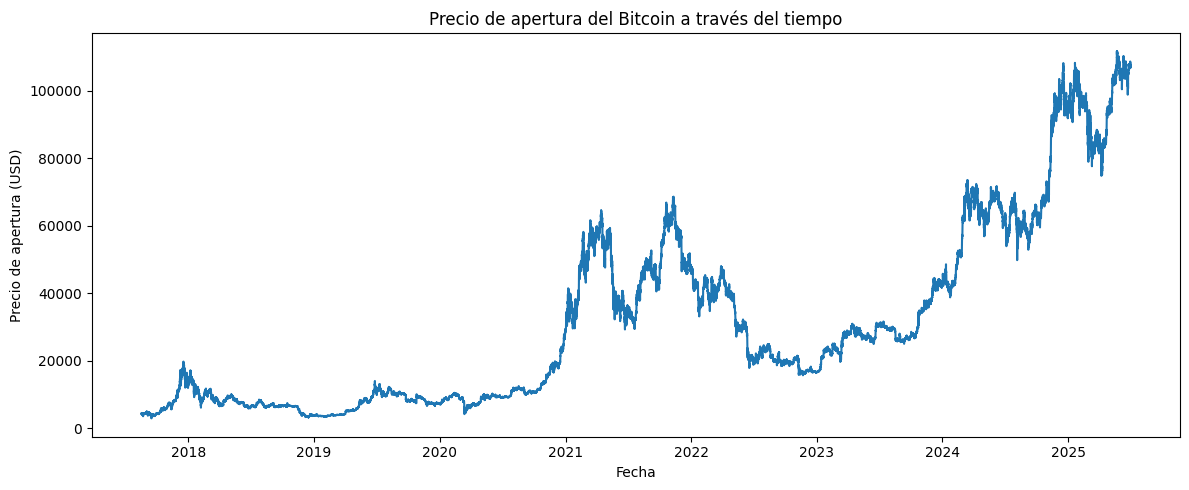

In [77]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_hora, x=df_hora.index, y="open")

plt.title("Precio de apertura del Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de apertura (USD)")
plt.tight_layout()
plt.show()

## Precio más alto de rango de bitcoin a través de los años

c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



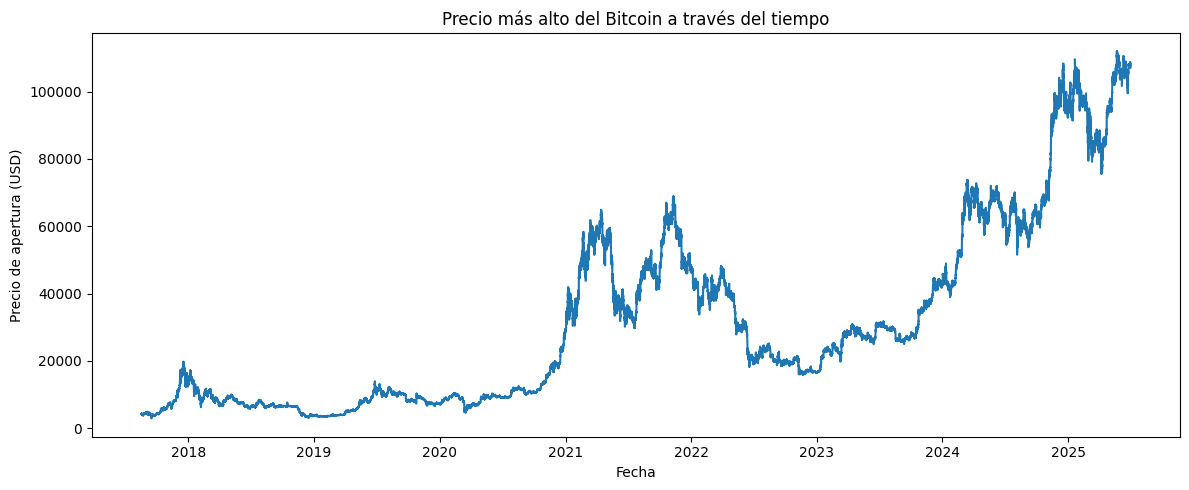

In [78]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_hora, x=df_hora.index, y="high")

plt.title("Precio más alto del Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de apertura (USD)")
plt.tight_layout()
plt.show()

## Precio de cierre del Bitcoin a través del tiempo

c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



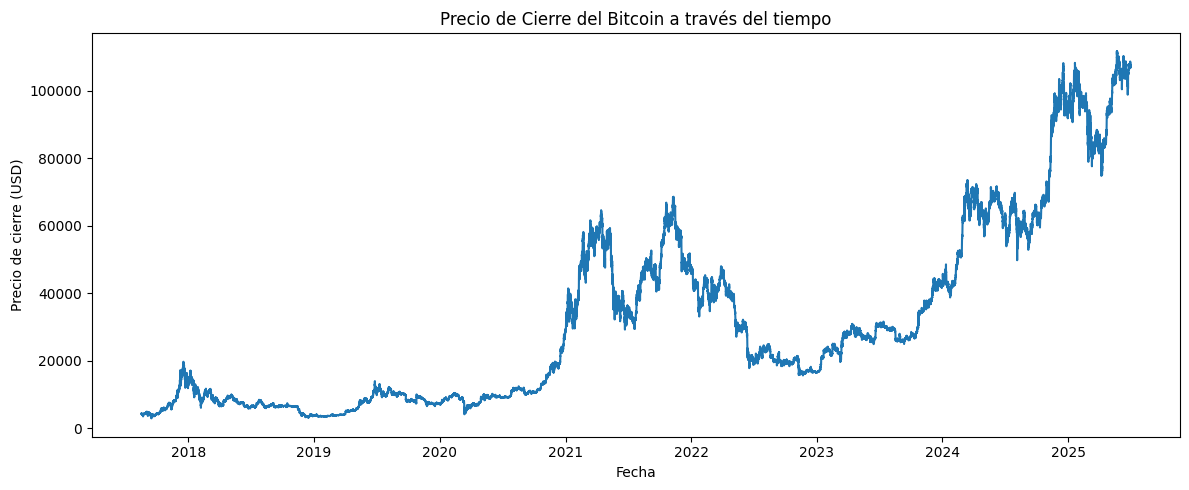

In [79]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_hora, x=df_hora.index, y="close")

plt.title("Precio de Cierre del Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.tight_layout()
plt.show()

c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



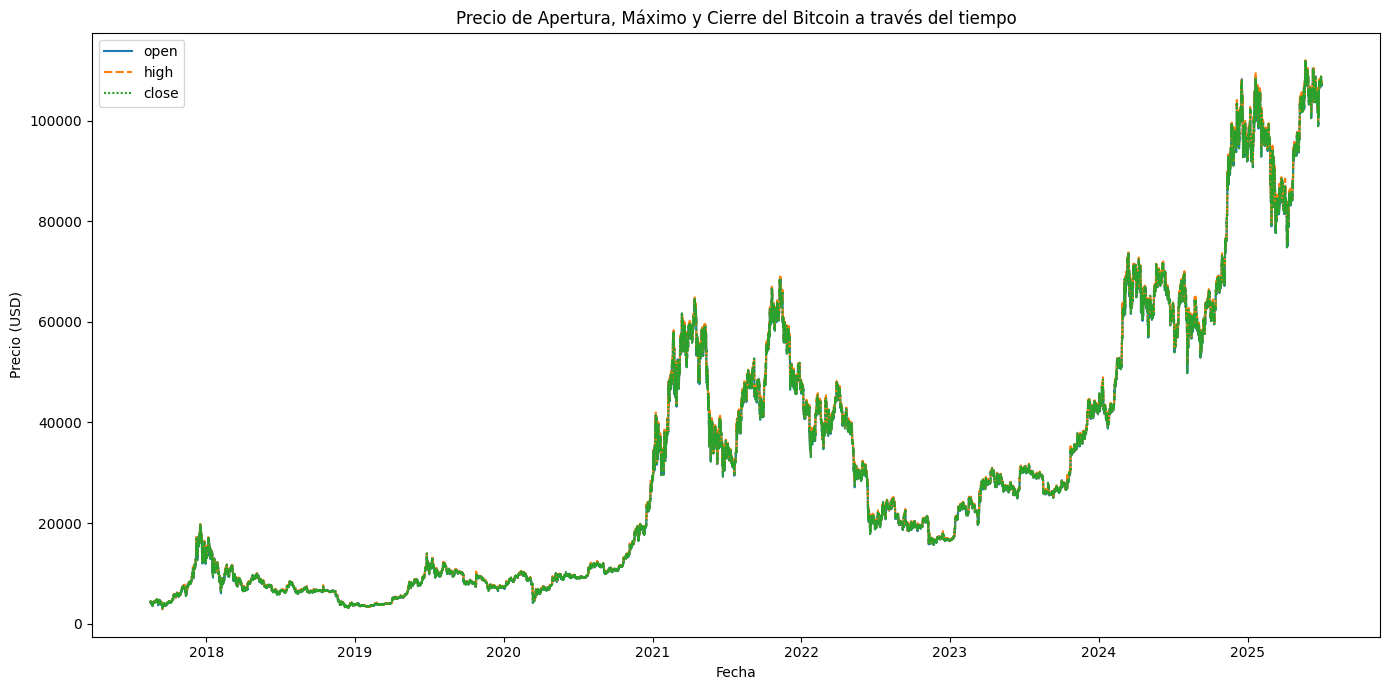

In [80]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_hora[["open", "high", "close"]])

plt.title("Precio de Apertura, Máximo y Cierre del Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.tight_layout()
plt.show()

In [81]:
df_hora.columns

Index(['date', 'hour', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'log_return', 'sma_3', 'sma_6', 'ema_3',
       'ema_6', 'macd', 'macd_signal', 'macd_hist', 'rsi_14', 'bb_middle',
       'bb_upper', 'bb_lower', 'atr_14', 'buy_pressure', 'range', 'body',
       'day_of_week', 'month'],
      dtype='object')

c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



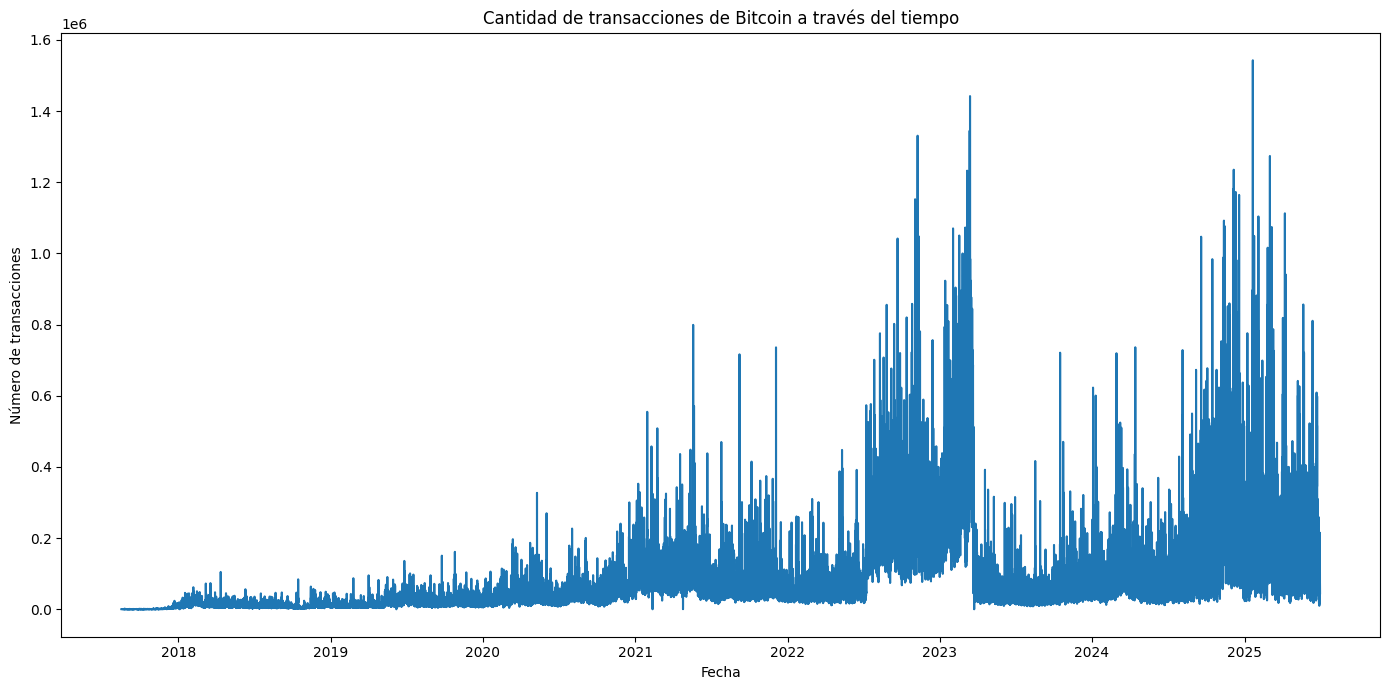

In [82]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_hora, x=df_hora.index, y="number_of_trades")

plt.title("Cantidad de transacciones de Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de transacciones")
plt.tight_layout()
plt.show()

In [83]:
df_hora.columns

Index(['date', 'hour', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'log_return', 'sma_3', 'sma_6', 'ema_3',
       'ema_6', 'macd', 'macd_signal', 'macd_hist', 'rsi_14', 'bb_middle',
       'bb_upper', 'bb_lower', 'atr_14', 'buy_pressure', 'range', 'body',
       'day_of_week', 'month'],
      dtype='object')

In [84]:
fig = go.Figure(data=go.Ohlc(x=df_hora['date'],
                    open=df_hora['open'],
                    high=df_hora['high'],
                    low=df_hora['low'],
                    close=df_hora['close']))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(title="Precio de Apertura, Máximo, Mínimo y Cierre del Bitcoin",
                  xaxis_title="Fecha",
                  yaxis_title="Precio (USD)")
fig.show()

## Mutual Information

In [87]:
from sklearn.feature_selection import mutual_info_regression

# X: todas las features numéricas
X = df_hora[['hour', 'close', 'volume',
             'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
             'taker_buy_quote_asset_volume', 'sma_3', 'sma_6', 'ema_3',
             'ema_6', 'macd', 'macd_signal', 'macd_hist', 'rsi_14', 'bb_middle',
             'bb_upper', 'bb_lower', 'atr_14', 'buy_pressure', 'range', 'body',
             'day_of_week', 'month']]

# y: variable objetivo continua
y = df_hora["log_return"]

# Calcular información mutua
mutual_info = mutual_info_regression(X, y)

# Crear un DataFrame ordenado
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Info': mutual_info})
mi_df = mi_df.sort_values(by='Mutual Info', ascending=False)

# Mostrar
print(mi_df)


                         Feature  Mutual Info
21                          body     0.757799
20                         range     0.157970
2                         volume     0.121263
5    taker_buy_base_asset_volume     0.114866
19                  buy_pressure     0.104247
6   taker_buy_quote_asset_volume     0.061520
3             quote_asset_volume     0.057255
4               number_of_trades     0.048804
8                          sma_6     0.043153
18                        atr_14     0.043025
1                          close     0.042226
16                      bb_upper     0.042054
10                         ema_6     0.041887
9                          ema_3     0.041741
7                          sma_3     0.041619
17                      bb_lower     0.038903
14                        rsi_14     0.037047
15                     bb_middle     0.036984
11                          macd     0.034458
13                     macd_hist     0.032818
12                   macd_signal  